# Exercise 3: A Quirk In The Dataset

The mean absolute difference of the y-channel can be used as a feature for activity classification. We have previously not used it (ie. it's not in `activity_classifier_utils.Featurize()`. But it is an extremely powerful feature for this  dataset. Build a model that uses ONLY this feature and evaluates its performance.

What conclusions can you draw from this?

Some basic imports. Feel free to make use of more than just these imports.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

import activity_classifier_utils

/Users/pvaish/.local/share/virtualenvs/nd320-c4-wearable-data-starter-98Z8Doq0/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Load the data

In [2]:
fs = 256
data = activity_classifier_utils.LoadWristPPGDataset()

## Generate Features

Use a 10 second non-overlapping window as we have been using and only compute the mean-absolute-difference for each window. Remember to keep track of the labels and subjects as we have been doing so that you can do leave-one-subject-out cross validation. If you get stuck, look at `activity_classifier_utils.GenerateFeatures()` or code from the previous lessons. It should look pretty similar.

In [8]:
window_length_s = 10
window_shift_s = 10
window_length = window_length_s * fs
window_shift = window_shift_s * fs
labels, subjects, features = [], [], []

# Compute features here
for subject, activity, df in data:
    for i in range(0, len(df) - window_length, window_shift):
        window = df[i: i + window_length]
        accx = window.accx.values
        accy = window.accy.values
        accz = window.accz.values
        
        # Compute the mean-absolute-difference in the y-channel
        mad_y = np.mean(np.abs(np.diff(accy)))
        features.append(mad_y)
        labels.append(activity)
        subjects.append(subject)
labels = np.array(labels)
subjects = np.array(subjects)
features = np.array(features).reshape(-1, 1)

In [10]:
features.shape

(611, 1)

In [15]:
set(labels)

{'bike', 'run', 'walk'}

## Evaluate Model Performance

Create a model and use `activity_classifier_utils.LOSOCVPerformance()` to evaluate its performance. Compute the classification accuracy and plot the confusion matrix using `activity_classifier_utils.PlotConfusionMatrix`. See previous videos in this lesson if you get stuck.

Normalized confusion matrix
[[0.90612245 0.09387755 0.        ]
 [0.03196347 0.95890411 0.00913242]
 [0.         0.0952381  0.9047619 ]]
Classification accuracy = 0.92


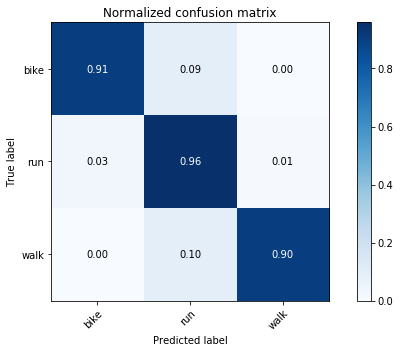

In [19]:
class_names = ['bike', 'run', 'walk']
clf = RandomForestClassifier(n_estimators = 100, max_depth = 4, random_state = 42, class_weight = 'balanced')
cm = activity_classifier_utils.LOSOCVPerformance(features,labels,subjects,clf)
activity_classifier_utils.PlotConfusionMatrix(cm, class_names, normalize = True)
print("Classification accuracy = {:0.2f}".format(np.sum(np.diag(cm)) / np.sum(np.sum(cm))))

Normalized confusion matrix
[[0.91836735 0.08163265 0.        ]
 [0.0456621  0.94520548 0.00913242]
 [0.         0.0952381  0.9047619 ]]
Classification accuracy = 0.92


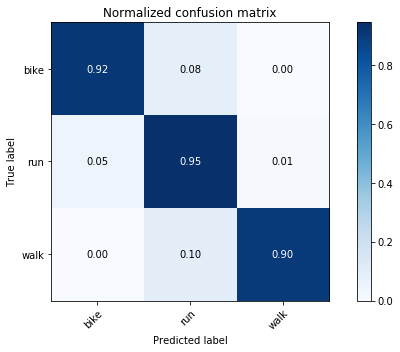

In [20]:
from sklearn.tree import DecisionTreeClassifier

class_names = ['bike', 'run', 'walk']
clf = DecisionTreeClassifier(max_depth = 2, class_weight = 'balanced')
cm = activity_classifier_utils.LOSOCVPerformance(features,labels,subjects,clf)
activity_classifier_utils.PlotConfusionMatrix(cm, class_names, normalize = True)
print("Classification accuracy = {:0.2f}".format(np.sum(np.diag(cm)) / np.sum(np.sum(cm))))

## Thoughts?

Why is this happening? What does it mean for our activity classification problem?